In [1]:
!pip install roboflow ultralytics supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 130.2 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 200.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 178.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 132.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 180.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.3/39.3 MB 146.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 131.5 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.0.0
    Uninstalling pillow-11.0.

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="fBERkblbV6p4KqyYXXGj")
project = rf.workspace("newworkspace-tmqsj").project("kidney-tumor-detection-golwd-4cqov")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-Tumor-Detection-1 in yolov8:: 100%|██████████| 9804/9804 [00:43<00:00, 225.79it/s]


WARNING ⚠️ user config directory '/root/.config/Ultralytics' is not writeable, defaulting to '/tmp' or CWD. Alternatively you can define a YOLO_CONFIG_DIR environment variable for this path.
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/tmp/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
rf = Roboflow(api_key="fBERkblbV6p4KqyYXXGj")
project = rf.workspace("newworkspace-tmqsj").project("kidney-stone-detection-grjvt-4r5xo")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Kidney-Stone-Detection-1 in yolov8:: 100%|██████████| 10132/10132 [00:47<00:00, 215.08it/s]


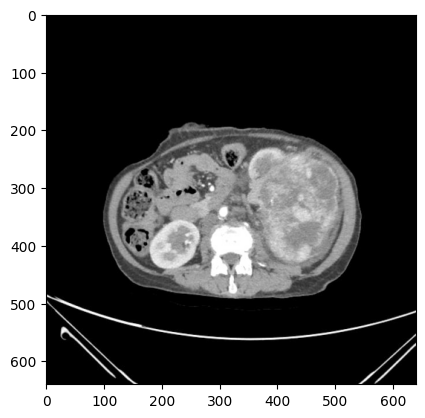

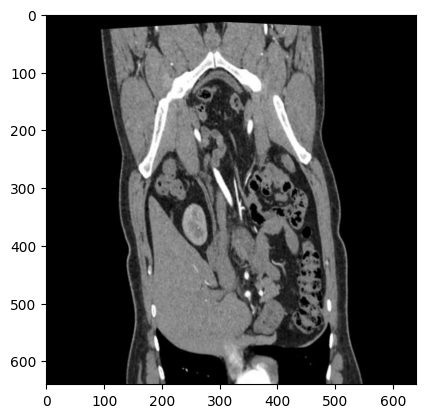

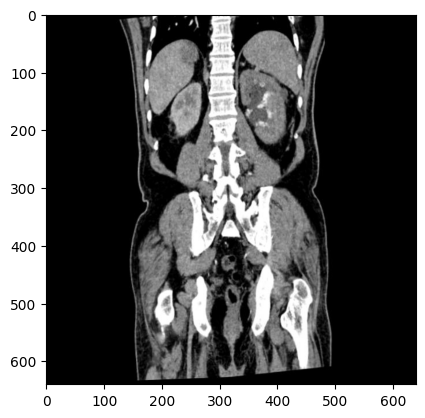

In [9]:
import os
import random
import matplotlib.pyplot as plt

imagePath = "/workspace/Kidney-Tumor-Detection/train/images/"

imagePathListed = os.listdir(imagePath)

imgList = []
for img in imagePathListed:
    imgFullPath = os.path.join(imagePath, img)
    imgList.append(imgFullPath)

randomImg = random.sample(imgList, 3)
for i in randomImg:
    img = plt.imread(i)
    plt.imshow(img)
    plt.show()

In [10]:
import os
import shutil

# Dataset yolları
datasets = [
    {
        "images_train": r"/workspace/Kidney-Tumor-Detection/train/images",
        "labels_train": r"/workspace/Kidney-Tumor-Detection/train/labels",
        "images_val": r"/workspace/Kidney-Tumor-Detection/valid/images",
        "labels_val": r"/workspace/Kidney-Tumor-Detection/valid/labels",
        "prefix": "ds1"
    },
    {
        "images_train": r"/workspace/Kidney-Stone-Detection/train/images",
        "labels_train": r"/workspace/Kidney-Stone-Detection/train/labels",
        "images_val": r"/workspace/Kidney-Stone-Detection/valid/images",
        "labels_val": r"/workspace/Kidney-Stone-Detection/valid/labels",
        "prefix": "ds2"
    }
]

# Merged dataset klasörleri
merged_train_images = "merged_dataset/train/images"
merged_train_labels = "merged_dataset/train/labels"
merged_val_images = "merged_dataset/val/images"
merged_val_labels = "merged_dataset/val/labels"

os.makedirs(merged_train_images, exist_ok=True)
os.makedirs(merged_train_labels, exist_ok=True)
os.makedirs(merged_val_images, exist_ok=True)
os.makedirs(merged_val_labels, exist_ok=True)

# Helper function: copy and rename
def copy_and_rename(src_images, src_labels, dest_images, dest_labels, prefix):
    for img_file in os.listdir(src_images):
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        # Image
        new_img_name = f"{prefix}_{img_file}"
        shutil.copy(os.path.join(src_images, img_file), os.path.join(dest_images, new_img_name))

        # Label
        lbl_file = img_file.rsplit('.', 1)[0] + ".txt"
        if os.path.exists(os.path.join(src_labels, lbl_file)):
            new_lbl_name = f"{prefix}_{lbl_file}"
            shutil.copy(os.path.join(src_labels, lbl_file), os.path.join(dest_labels, new_lbl_name))

# Tüm datasetleri birleştir
for ds in datasets:
    # Train
    copy_and_rename(ds["images_train"], ds["labels_train"], merged_train_images, merged_train_labels, ds["prefix"])
    # Validation
    copy_and_rename(ds["images_val"], ds["labels_val"], merged_val_images, merged_val_labels, ds["prefix"])

print("Birleştirme tamamlandı.")
print("Train görüntü sayısı:", len(os.listdir(merged_train_images)))
print("Validation görüntü sayısı:", len(os.listdir(merged_val_images)))

Birleştirme tamamlandı.
Train görüntü sayısı: 8706
Validation görüntü sayısı: 835


In [13]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
dataPath = "/workspace/Kidney-Detection/data.yaml"

model.train(data=dataPath, 
           epochs=45,
           imgsz=640,
           lr0=0.01,
           patience=5)

Ultralytics 8.3.193 🚀 Python-3.11.11 torch-2.8.0.dev20250319+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32120MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/Kidney-Detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=45, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0,

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x76ac5d642810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [14]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
dataPath = "/workspace/Kidney-Detection/data.yaml"

model.train(data=dataPath, 
           epochs=45,
           imgsz=640,
           lr0=0.01,
           patience=5)

Ultralytics 8.3.193 🚀 Python-3.11.11 torch-2.8.0.dev20250319+cu128 CUDA:0 (NVIDIA GeForce RTX 5090, 32120MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/workspace/Kidney-Detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=45, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=5, perspective=0.0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x76aa6b47ef10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [17]:
modelPt = "/workspace/runs/detect/train2/weights/best.pt"
test_images = "/workspace/Kidney-Stone-Detection/test/images/1-3-46-670589-33-1-63703718086181123700001-4795376984778662199_png_jpg.rf.d94ba10f2133466751c21b48baf5b4d1.jpg"
model = YOLO(modelPt)

result = model(test_images, save=True)


image 1/1 /workspace/Kidney-Stone-Detection/test/images/1-3-46-670589-33-1-63703718086181123700001-4795376984778662199_png_jpg.rf.d94ba10f2133466751c21b48baf5b4d1.jpg: 640x640 9 stones, 2.9ms
Speed: 0.7ms preprocess, 2.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /workspace/runs/detect/predict3
